In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week 3 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")

# Check the structure of the dataset
print("Dataset Information:")
df.info()

# Preview the dataset
df.head()

<ipython-input-5-7a4d30f03af8>:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Week 3 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# province data
df["Province"].tail()

,Province
1000093,Western Cape
1000094,Western Cape
1000095,Western Cape
1000096,Western Cape
1000097,Western Cape


In [8]:
# Descriptive statistics for total_claims
total_claims = ['TotalClaims']
print("Descriptive Statistics:")
df[total_claims].describe()

Descriptive Statistics:


,TotalClaims
count,1.000098e+06
mean,6.486119e+01
std,2.384075e+03
min,-1.200241e+04
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,3.930921e+05


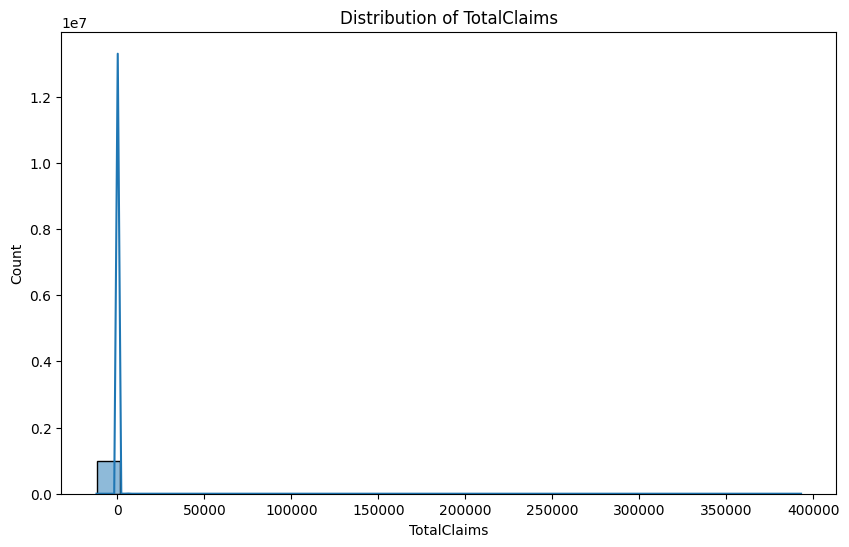

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for total claims
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], kde=True, bins=30)
plt.title('Distribution of TotalClaims')
plt.show()

In [10]:
# Group the data by Province
province_grouped = df.groupby('Province')['TotalClaims'].mean()

# Display the mean of Total Claims for each Province
print(province_grouped)

Province
Eastern Cape     44.713432
Free State       43.822975
Gauteng          74.630009
KwaZulu-Natal    84.234293
Limpopo          40.927553
Mpumalanga       38.785147
North West       41.317426
Northern Cape    14.026726
Western Cape     60.831482
Name: TotalClaims, dtype: float64


In [20]:
from scipy.stats import ttest_ind

# Select two provinces for comparison: Gauteng and Mpumalanga
province_gauteng = df[df['Province'] == 'Gauteng']['TotalClaims'].dropna()
province_mpumalanga = df[df['Province'] == 'Mpumalanga']['TotalClaims'].dropna()

# Check the sizes of each province group
size_gauteng = len(province_gauteng)
size_mpumalanga = len(province_mpumalanga)

print(f"Size of Gauteng: {size_gauteng}")
print(f"Size of Mpumalanga: {size_mpumalanga}")

# Downsample the larger group to match the size of the smaller group
min_size = min(size_gauteng, size_mpumalanga)

province_gauteng_sample = province_gauteng.sample(n=min_size, random_state=42)
province_mpumalanga_sample = province_mpumalanga.sample(n=min_size, random_state=42)

# Perform t-test for independent samples (unequal variance assumption)
t_stat, p_value = ttest_ind(province_gauteng_sample, province_mpumalanga_sample, equal_var=False)

# Print t-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print(f"Reject null hypothesis: There is a significant difference in risk (TotalClaims) between Gauteng and Mpumalanga.")
else:
    print(f"Fail to reject null hypothesis: No significant risk difference in TotalClaims between Gauteng and Mpumalanga.")


Size of Gauteng: 393865
Size of Mpumalanga: 52718
T-statistic: 2.9676093620280968, P-value: 0.003002111339628559
Reject null hypothesis: There is a significant difference in risk (TotalClaims) between Gauteng and Mpumalanga.
